# <center>Graded Challenge 5</center>
Name: Rahardiansyah Fatoni

Batch : RMT-027

Objective:
- Memperoleh data menggunakan BigQuery.
- Memahami konsep Classification dengan Logistic Regression, SVM, dan KNN.
- Mempersiapkan data untuk digunakan dalam model Logistic Regression, SVM, dan KNN.
- Mengimplementasikan Logistic Regression, SVM, dan KNN untuk membuat prediksi.
- Mendeploy project menggunakan Streamlit dan Huggingface.

Link Deployment: https://huggingface.co/spaces/Rahardiansyah/GC5_rahardiansyah_fatoni

#Conceptual Problems

1. Apakah yang dimaksud dengan coeficient pada logistic regression?

2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

3. Bagaimana cara memilih K yang optimal pada KNN ?

4. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

- Jawaban:
1. Koefisien pada logistik regresi memberikan informasi tentang seberapa besar pengaruh setiap variabel independen terhadap variabel target. Jika koefisien positif, maka peningkatan nilai variabel independen juga meningkatkan kemungkinan positif dari variabel target, dan sebaliknya.
2. Parameter kernel digunakan untuk memudahkan proses klasifikasi terhadap sebuah dataset yaitu dengan cara merubah (transform) data input menjadi data dengan dimensi lebih tinggi. Salah satu fungsi kernel yang dapat digunakan adalah kernel linear, yang dapat digunakan sebagai acuan sebelum menggunakan fungsi kernel yang lebih rumit, dan dapat digunakan untuk mengklasifikasikan input data yang dapat terpisah secara linear.
3. Tidak ada cara jitu untuk menentukan K yang optimal pada algoritma KNN, value terbaik akan ditemukan dengan mencoba-coba berbagai nilai K dan melihat hasil prediksinya.
4.
- `accuracy` : Memberi informasi tentang berapa banyak (%) prediksi yang benar ((TP+TN)/TP+TN+FP+FN). Digunakan jika data positif dan negatif dataset seimbang.
- `precision` : Memberi informasi tentang seberapa banyak (%) kelas positif yang diprediksi oleh model (TP/FP+TP). Digunakan saat angka FP tinggi dan dibutuhkan angka FP serendah mungkin.
- `recall` : Memberi informasi tentang seberapa banyak (%) kelas positif dari semua nilai positif dataset. (TP/FN+TP). Digunakan saat angka FN tinggi dan dibutuhkan angka FN serendah mungkin.
- `f1 score` : Memberi informasi gabungan dari `accuracy` dan `precision`. yang didalam perhitungannya menggunakan FP dan FN. (2 x `precision` x `recall`/ (`precision`+`recall`). Cocok digunakan untuk data yang memiliki ketidak seimbangan pada kelas dibanding `accuracy`. juga dapat digunakan pada data dengan kelas yang seimbang.


#Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from mlxtend.plotting import plot_decision_regions

#Model saving
import pickle, joblib
import json

#Query the Dataset

In [2]:
from google.colab import auth
from google.cloud import bigquery

auth.authenticate_user()
project_id = "proud-woods-408708" # Ini project ID
client = bigquery.Client(project=project_id)

In [3]:
query = """
SELECT limit_balance, age, pay_0, pay_2, pay_3, pay_4, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
CAST(sex AS INT) AS sex,
CAST(education_level AS INT) AS education_level,
CAST(marital_status AS INT) AS marital_status,
CAST(pay_5 AS FLOAT64) AS pay_5,
CAST(pay_6 AS FLOAT64) AS pay_6,
CAST(default_payment_next_month AS INT) AS default_payment_next_month,
FROM bigquery-public-data.ml_datasets.credit_card_default
LIMIT 54027;"""
# Set up the query
df = client.query(query).to_dataframe()
df.T

,0,1,2,3,4,5,6,7,8,9,...,2955,2956,2957,2958,2959,2960,2961,2962,2963,2964
limit_balance,80000.0,200000.0,20000.0,260000.0,150000.0,300000.0,130000.0,200000.0,500000.0,230000.0,...,360000.0,100000.0,30000.0,80000.0,20000.0,80000.0,50000.0,450000.0,50000.0,290000.0
age,54.0,49.0,22.0,33.0,32.0,32.0,45.0,58.0,39.0,48.0,...,26.0,40.0,48.0,39.0,26.0,28.0,51.0,38.0,44.0,39.0
pay_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1.0
pay_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0
pay_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0
pay_4,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-2.0,-1.0,-2.0,-2.0,-1.0,-2.0,-2.0,-2.0
bill_amt_1,61454.0,49221.0,19568.0,18457.0,159919.0,54053.0,58180.0,192461.0,133598.0,160879.0,...,1968.0,12878.0,-100.0,5280.0,96.0,4280.0,752.0,390.0,1473.0,-70.0
bill_amt_2,61808.0,49599.0,19420.0,22815.0,68686.0,65235.0,59134.0,195970.0,167378.0,161797.0,...,459.0,7702.0,100.0,5000.0,780.0,2800.0,300.0,390.0,390.0,9540.0
bill_amt_3,62290.0,50942.0,15535.0,27086.0,161192.0,64747.0,61156.0,122214.0,171106.0,165107.0,...,2500.0,2377.0,0.0,5000.0,0.0,0.0,5880.0,390.0,390.0,390.0
bill_amt_4,29296.0,50146.0,1434.0,27821.0,150464.0,65150.0,62377.0,124647.0,174500.0,105508.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390.0,390.0,3184.0


In [4]:
df['pay_0'].value_counts()

pay_0
 0.0    1516
-1.0     540
 1.0     356
 2.0     262
-2.0     247
 3.0      29
 4.0       7
 8.0       3
 5.0       2
 7.0       2
 6.0       1
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   age                         2965 non-null   float64
 2   pay_0                       2965 non-null   float64
 3   pay_2                       2965 non-null   float64
 4   pay_3                       2965 non-null   float64
 5   pay_4                       2965 non-null   float64
 6   bill_amt_1                  2965 non-null   float64
 7   bill_amt_2                  2965 non-null   float64
 8   bill_amt_3                  2965 non-null   float64
 9   bill_amt_4                  2965 non-null   float64
 10  bill_amt_5                  2965 non-null   float64
 11  bill_amt_6                  2965 non-null   float64
 12  pay_amt_1                   2965 non-null   float64
 13  pay_amt_2                   2965 

$Insight:$
- No noticeable null value entries.
- No column is classified as an object data type.

#Data Filtering

In [6]:
num_columns = df.select_dtypes(include='number').columns.tolist()

In [7]:
for col in num_columns:
  print(f" {col} :")
  print(f"{df[col].value_counts()}")

 limit_balance :
limit_balance
50000.0     348
20000.0     203
200000.0    150
30000.0     148
80000.0     145
100000.0    123
150000.0    122
180000.0     97
210000.0     84
140000.0     83
120000.0     80
360000.0     78
70000.0      76
90000.0      71
260000.0     70
130000.0     69
60000.0      68
230000.0     68
300000.0     67
160000.0     62
500000.0     56
240000.0     56
110000.0     54
170000.0     52
280000.0     50
10000.0      46
220000.0     43
290000.0     37
320000.0     32
250000.0     28
310000.0     28
40000.0      26
400000.0     25
350000.0     24
420000.0     20
270000.0     19
390000.0     16
330000.0     16
380000.0     16
340000.0     15
190000.0     12
410000.0     12
450000.0      9
460000.0      8
490000.0      8
370000.0      8
470000.0      7
440000.0      6
480000.0      5
430000.0      5
510000.0      4
530000.0      3
560000.0      1
680000.0      1
700000.0      1
800000.0      1
780000.0      1
750000.0      1
620000.0      1
Name: count, dtype: int64

$Insight:$
- From the provided value counts, we can conclude that some columns such as `marital_status` and `sex` should be treated as categorical values while `education_level`,`pay_0` to `pay_6` should be treated as ordinal values, not numerical values.

In [8]:
cat_columns = ['marital_status','sex']
ord_columns = ['education_level', 'pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
num_columns_new = [x for x in num_columns if x not in cat_columns and x not in ord_columns]
num_columns_new.remove('default_payment_next_month')

Numerical Columns:

In [9]:
num_columns_new

['limit_balance',
 'age',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

Categorical Columns:

In [10]:
for col in cat_columns:
  print(f" {col} :")
  print(f"{df[col].value_counts()}")

 marital_status :
marital_status
2    1594
1    1332
3      35
0       4
Name: count, dtype: Int64
 sex :
sex
2    1802
1    1163
Name: count, dtype: Int64


$Insight:$
- From bigquery SCHEMA: `1` = married, `2` = single, `3` = others.
- `0` is assumed to be non valid entry, therefore we will drop it.

In [11]:
df['marital_status'] = np.where((df['marital_status'] != 0), df['marital_status'], np.nan)

In [12]:
df.dropna(inplace=True)

In [13]:
cat_columns

['marital_status', 'sex']

Ordinal Column:

In [14]:
for col in ord_columns:
  print(f" {col} :")
  print(f"{df[col].value_counts()}")

 education_level :
education_level
2    1400
1    1039
3     479
5      24
4      13
6       4
0       2
Name: count, dtype: Int64
 pay_0 :
pay_0
 0.0    1514
-1.0     540
 1.0     355
 2.0     262
-2.0     246
 3.0      29
 4.0       7
 8.0       3
 5.0       2
 7.0       2
 6.0       1
Name: count, dtype: int64
 pay_2 :
pay_2
 0.0    1605
-1.0     580
 2.0     373
-2.0     352
 3.0      32
 4.0       8
 1.0       4
 7.0       3
 5.0       2
 6.0       2
Name: count, dtype: int64
 pay_3 :
pay_3
 0.0    1607
-1.0     580
 2.0     368
-2.0     366
 3.0      22
 4.0       8
 6.0       4
 5.0       3
 7.0       3
Name: count, dtype: int64
 pay_4 :
pay_4
 0.0    1665
-1.0     531
-2.0     407
 2.0     324
 3.0      14
 4.0       7
 7.0       6
 5.0       5
 6.0       1
 8.0       1
Name: count, dtype: int64
 pay_5 :
pay_5
 0.0    1701
-1.0     503
-2.0     440
 2.0     279
 3.0      19
 4.0       9
 7.0       7
 5.0       2
 6.0       1
Name: count, dtype: int64
 pay_6 :
pay_6
 0.0    1625

$Insight:$
- From bigquery SCHEMA: Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- 0, 5, and 6 is assumed to be non valid entry, therefore we will drop it.
- From bigquery SCHEMA: `pay_0` = Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above).
- The value of `-2.0` and `0.0` is unexplained and therefore we will drop all instances of it in `pay_0` to `pay_6`.

In [15]:
df['education_level'] = np.where((df['education_level'] != 5) & (df['education_level'] != 6) & (df['education_level'] != 0), df['education_level'], np.nan)

In [16]:
df['pay_0'] = np.where((df['pay_0'] != -2.0) & (df['pay_0'] != 0.0), df['pay_0'], np.nan)
df['pay_2'] = np.where((df['pay_2'] != -2.0) & (df['pay_2'] != 0.0), df['pay_2'], np.nan)
df['pay_3'] = np.where((df['pay_3'] != -2.0) & (df['pay_3'] != 0.0), df['pay_3'], np.nan)
df['pay_4'] = np.where((df['pay_4'] != -2.0) & (df['pay_4'] != 0.0), df['pay_4'], np.nan)
df['pay_5'] = np.where((df['pay_5'] != -2.0) & (df['pay_5'] != 0.0), df['pay_5'], np.nan)
df['pay_6'] = np.where((df['pay_6'] != -2.0) & (df['pay_6'] != 0.0), df['pay_6'], np.nan)

In [17]:
df.dropna(inplace=True)

In [18]:
ord_columns

['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

After the filtering let's see the newest information of our `df`:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 1812 to 2523
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               391 non-null    float64
 1   age                         391 non-null    float64
 2   pay_0                       391 non-null    float64
 3   pay_2                       391 non-null    float64
 4   pay_3                       391 non-null    float64
 5   pay_4                       391 non-null    float64
 6   bill_amt_1                  391 non-null    float64
 7   bill_amt_2                  391 non-null    float64
 8   bill_amt_3                  391 non-null    float64
 9   bill_amt_4                  391 non-null    float64
 10  bill_amt_5                  391 non-null    float64
 11  bill_amt_6                  391 non-null    float64
 12  pay_amt_1                   391 non-null    float64
 13  pay_amt_2                   391 non-

$Insight:$
- As the entries went from 2965 from the original `df` down to 2931 from the filtered `df` we can conclude that the filtering didn't remove a significant portion of `df`.

#Split between X (Features) and Y (Target)

In [20]:
X = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

#Split between Train-set and Test-set

In [21]:
# Split dataset into train-Set and test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (293, 23)
Test size  :  (98, 23)


#Feature Selection

Now, we will use Kendall Tau correlation for the categorical features of `X_train` and `y_train` since it is well-suited for assessing the monotonic relationship between ordinal or categorical variables and the target.

For numerical features in `X_train`, we will use Pearson correlation, as it is appropriate for measuring linear relationships between two continuous variables. This tailored approach allows us to capture and assess different types of relationships present in the data.

##Categorical features:

In [22]:
from scipy.stats import chi2_contingency

# We will use a for loop to get the chi-square test values of each categorical feature.
for i in cat_columns:
    contingency_table = pd.crosstab(X_train[i], y_train)
    chi2_stat, pval_chi2, dof, expected = chi2_contingency(contingency_table)

    if pval_chi2 > 0.05:
        print(f"- No significant association between 'default_payment_next_month' and {i}")
    else:
        print(f"- Significant association between 'default_payment_next_month' and {i}:")
        print(f"  Chi-Square Stat: {chi2_stat:.2f}, p-value: {pval_chi2}")
    print("")

- No significant association between 'default_payment_next_month' and marital_status

- No significant association between 'default_payment_next_month' and sex



##Ordinal Features:

In [23]:
#We will use a for loop to get the Kendall Tau values of each categorical features.
for i in ord_columns:
    corr_tau, pval_k = stats.kendalltau(X_train[i], y_train)

    if pval_k > 0.05:
        print("")
        print(f"- No significant correlation between 'default_payment_next_month' and {i}")
    else:
        print("")
        print(f"- Significant correlation between 'default_payment_next_month' and {i}:")
        print(f"  Kendall correlation: {corr_tau:.2f}, p-value: {pval_k}")


- Significant correlation between 'default_payment_next_month' and education_level:
  Kendall correlation: 0.15, p-value: 0.0077002298119030034

- Significant correlation between 'default_payment_next_month' and pay_0:
  Kendall correlation: 0.65, p-value: 4.6249393136254643e-32

- Significant correlation between 'default_payment_next_month' and pay_2:
  Kendall correlation: 0.58, p-value: 7.13379414838104e-24

- Significant correlation between 'default_payment_next_month' and pay_3:
  Kendall correlation: 0.59, p-value: 3.730516665432232e-25

- Significant correlation between 'default_payment_next_month' and pay_4:
  Kendall correlation: 0.61, p-value: 2.103754361172241e-27

- Significant correlation between 'default_payment_next_month' and pay_5:
  Kendall correlation: 0.61, p-value: 5.083077617053764e-27

- Significant correlation between 'default_payment_next_month' and pay_6:
  Kendall correlation: 0.61, p-value: 2.591586283482075e-26


##Numerical Features:

In [24]:
for i in num_columns_new:
    corr_tau, pval_k = stats.kendalltau(X_train[i], y_train)

    if pval_k > 0.05:
      print("")
      print(f"- No significant correlation between 'default_payment_next_month' and {i}")
    else:
      print("")
      print(f"- Significant correlation between 'default_payment_next_month' and {i}:")
      print(f"  Kendall correlation: {corr_tau:.2f}, p-value: {pval_k}")


- Significant correlation between 'default_payment_next_month' and limit_balance:
  Kendall correlation: -0.23, p-value: 1.4695588034201055e-06

- No significant correlation between 'default_payment_next_month' and age

- Significant correlation between 'default_payment_next_month' and bill_amt_1:
  Kendall correlation: 0.29, p-value: 1.8948475704270097e-09

- Significant correlation between 'default_payment_next_month' and bill_amt_2:
  Kendall correlation: 0.27, p-value: 1.002878927515214e-08

- Significant correlation between 'default_payment_next_month' and bill_amt_3:
  Kendall correlation: 0.27, p-value: 1.0103116149398674e-08

- Significant correlation between 'default_payment_next_month' and bill_amt_4:
  Kendall correlation: 0.29, p-value: 2.2392669435698037e-09

- Significant correlation between 'default_payment_next_month' and bill_amt_5:
  Kendall correlation: 0.29, p-value: 1.0741417630349699e-09

- Significant correlation between 'default_payment_next_month' and bill_amt

#**Feature Insight:**

- The features from `cat_columns` have no correlation to the target
- The features from `ord_columns` that have a correlation to the target include: `education_level, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6`.
- The features from `num_columns` that have a correlation to the target include:
`limit_balance pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6`.

Therefore we will use the feature with the highest correlation and lowest p-value, which is:
- `education_level` to know the subject's education level.
- `pay_0` to `pay_6` to know the subject's tendency to pay.
- `limit_balance` to know subject's current limit balance.
These features show significant correlations with the target and have relatively low p-values, indicating that the associations are statistically significant.

Therefore, we will adjust the `X_train` and `X_test` accordingly

In [25]:
for column in num_columns:
  if column not in ['default_payment_next_month', 'limit_balance']:
    print(column)

age
pay_0
pay_2
pay_3
pay_4
bill_amt_1
bill_amt_2
bill_amt_3
bill_amt_4
bill_amt_5
bill_amt_6
pay_amt_1
pay_amt_2
pay_amt_3
pay_amt_4
pay_amt_5
pay_amt_6
sex
education_level
marital_status
pay_5
pay_6


In [26]:
columns_to_keep = ['limit_balance','education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [27]:
columns_to_drop = [col for col in X_train.columns if col not in columns_to_keep]
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [28]:
X_train

,limit_balance,pay_0,pay_2,pay_3,pay_4,education_level,pay_5,pay_6
2385,130000.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0
2217,170000.0,-1.0,2.0,-1.0,2.0,1.0,-1.0,-1.0
2236,170000.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
1879,280000.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
2254,250000.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...
2406,390000.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0
2228,220000.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
1981,100000.0,-1.0,-1.0,-1.0,2.0,3.0,2.0,-1.0
1877,150000.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 2385 to 2195
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    293 non-null    float64
 1   pay_0            293 non-null    float64
 2   pay_2            293 non-null    float64
 3   pay_3            293 non-null    float64
 4   pay_4            293 non-null    float64
 5   education_level  293 non-null    float64
 6   pay_5            293 non-null    float64
 7   pay_6            293 non-null    float64
dtypes: float64(8)
memory usage: 28.7 KB


In [30]:
num_columns_new2 = ['limit_balance']

In [31]:
pay_columns = [
    'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'
]

In [32]:
education_column = ['education_level']

In [33]:
X_train.columns

Index(['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'education_level',
       'pay_5', 'pay_6'],
      dtype='object')

In [34]:
pay_0_values= [-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
pay_2_values= [-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
pay_3_values= [-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
pay_4_values= [-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
pay_5_values= [-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
pay_6_values= [-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
education_level_values= [1,2,3,4]
pay_ord= OrdinalEncoder(categories=[pay_0_values,pay_2_values,pay_3_values,pay_4_values,pay_5_values,pay_6_values])
edu_ord= OrdinalEncoder(categories=[education_level_values])

In [35]:
pay_ord

OrdinalEncoder(categories=[[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0],
                           [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0],
                           [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0],
                           [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0],
                           [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0],
                           [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]])

In [36]:
edu_ord

OrdinalEncoder(categories=[[1, 2, 3, 4]])

#Pipeline Preprocessing (MinMax Scaler)

In [37]:
minmax_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler())
pay_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                 pay_ord)
edu_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                 edu_ord)
minmaxscaler_pipeline = ColumnTransformer([
    ('minmax_pipe', minmax_pipeline, num_columns_new2),
    ('pay_pipe', pay_pipeline, pay_columns),
    ('edu_pipe', edu_pipeline, education_column)
],
remainder="passthrough",
)

In [38]:
minmaxscaler_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmax_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['limit_balance']),
                                ('pay_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6....
                                                                             [-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6.0,
                                                                              7.0,
                                                                              8.0,
                                                                              9.0],
                                                                             [-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6.0,
                                                                              7.0,
                                                                              8.0,
                                                                              9.0],
                                                                             [-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6.0,
                                                                              7.0,
                                                                              8.0,
                                                                              9.0]]))]),
                                 ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
                                  'pay_6']),
                                ('edu_pipe',
                                 Pipeline(st

In [39]:
X_train_minmax= minmaxscaler_pipeline.fit_transform(X_train)
X_test_minmax= minmaxscaler_pipeline.transform(X_test)

###Logistic Regression:

In [40]:
lr = LogisticRegression(random_state=11)
lr.fit(X_train_minmax,y_train)

LogisticRegression(random_state=11)

F1 Score - train Set  :  0.8035714285714286 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       180
         1.0       0.81      0.80      0.80       113

    accuracy                           0.85       293
   macro avg       0.84      0.84      0.84       293
weighted avg       0.85      0.85      0.85       293
 

Confusion Matrix      : 


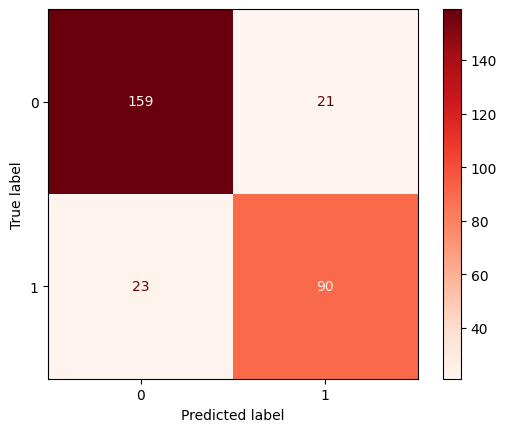

In [41]:
y_pred_lr_minmax = lr.predict(X_train_minmax)

print('F1 Score - train Set  : ', f1_score(y_train, y_pred_lr_minmax), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_lr_minmax), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_train_minmax, y_train, cmap='Reds'))

F1 Score - test Set  :  0.7012987012987013 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        61
         1.0       0.68      0.73      0.70        37

    accuracy                           0.77        98
   macro avg       0.75      0.76      0.75        98
weighted avg       0.77      0.77      0.77        98
 

Confusion Matrix      : 


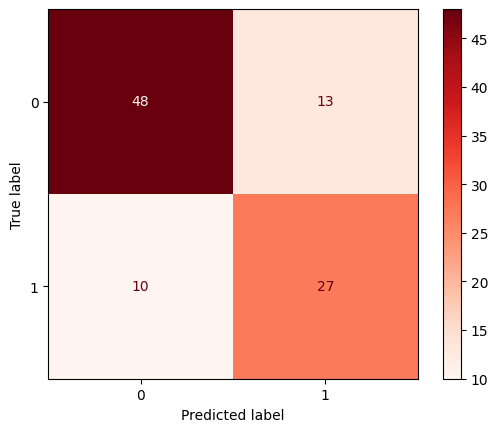

In [42]:
# Check Performance Model against Test-Set

y_pred_lr_minmax_test = lr.predict(X_test_minmax)

print('F1 Score - test Set  : ', f1_score(y_test, y_pred_lr_minmax_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_lr_minmax_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_test_minmax, y_test, cmap='Reds'))

###KNN:

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train_minmax,y_train)

KNeighborsClassifier()

F1 Score - train Set  :  0.8093023255813954 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       180
         1.0       0.85      0.77      0.81       113

    accuracy                           0.86       293
   macro avg       0.86      0.84      0.85       293
weighted avg       0.86      0.86      0.86       293
 

Confusion Matrix      : 


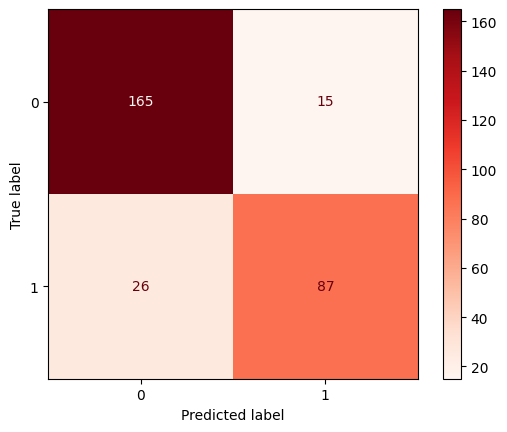

In [44]:
y_pred_knn_minmax = knn.predict(X_train_minmax)

print('F1 Score - train Set  : ', f1_score(y_train, y_pred_knn_minmax), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_knn_minmax), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_minmax, y_train, cmap='Reds'))

F1 Score - test Set  :  0.7105263157894737 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.83      0.80      0.82        61
         1.0       0.69      0.73      0.71        37

    accuracy                           0.78        98
   macro avg       0.76      0.77      0.76        98
weighted avg       0.78      0.78      0.78        98
 

Confusion Matrix      : 


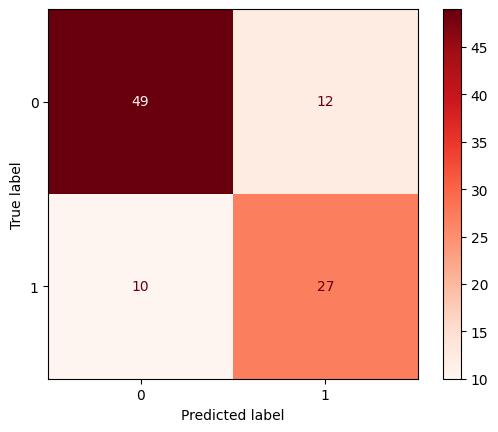

In [45]:
# Check Performance Model against Test-Set

y_pred_knn_minmax_test = knn.predict(X_test_minmax)

print('F1 Score - test Set  : ', f1_score(y_test, y_pred_knn_minmax_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_knn_minmax_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_test_minmax, y_test, cmap='Reds'))

###SVC:

In [46]:
svc = SVC()
svc.fit(X_train_minmax,y_train)

SVC()

F1 Score - train Set  :  0.8093023255813954 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       180
         1.0       0.85      0.77      0.81       113

    accuracy                           0.86       293
   macro avg       0.86      0.84      0.85       293
weighted avg       0.86      0.86      0.86       293
 

Confusion Matrix      : 


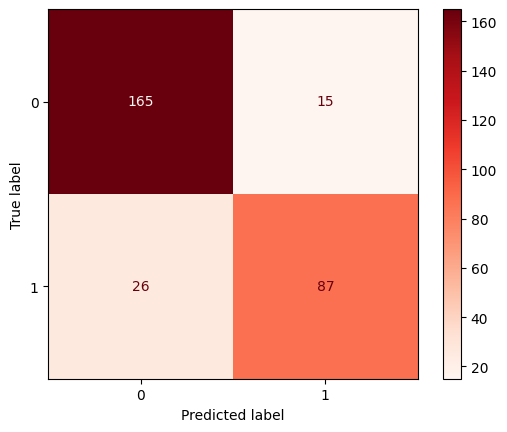

In [47]:
y_pred_svc_minmax = svc.predict(X_train_minmax)

print('F1 Score - train Set  : ', f1_score(y_train, y_pred_svc_minmax), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_svc_minmax), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_train_minmax, y_train, cmap='Reds'))

F1 Score - test Set  :  0.7272727272727273 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        61
         1.0       0.70      0.76      0.73        37

    accuracy                           0.79        98
   macro avg       0.77      0.78      0.78        98
weighted avg       0.79      0.79      0.79        98
 

Confusion Matrix      : 


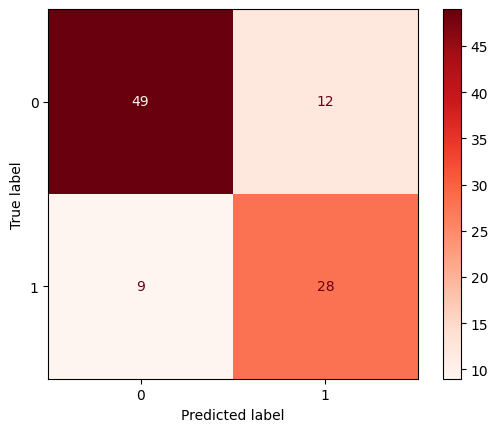

In [48]:
# Check Performance Model against Test-Set

y_pred_svc_minmax_test = svc.predict(X_test_minmax)

print('F1 Score - test Set  : ', f1_score(y_test, y_pred_svc_minmax_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_svc_minmax_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_test_minmax, y_test, cmap='Reds'))

###Minmax Comparison:

In [49]:
print(f"LR-Train: {f1_score(y_train, y_pred_lr_minmax)}")
print(f"LR-Test: {f1_score(y_test, y_pred_lr_minmax_test)}")
print(f"Difference: {f1_score(y_train, y_pred_lr_minmax)-f1_score(y_test, y_pred_lr_minmax_test)}")
print("")
print(f"KNN-Train: {f1_score(y_train, y_pred_knn_minmax)}")
print(f"KNN-Test: {f1_score(y_test, y_pred_knn_minmax_test)}")
print(f"Difference: {f1_score(y_train, y_pred_knn_minmax)-f1_score(y_test, y_pred_knn_minmax_test)}")
print("")
print(f"SVC-Train: {f1_score(y_train, y_pred_svc_minmax)}")
print(f"SVC-Test: {f1_score(y_test, y_pred_svc_minmax_test)}")
print(f"Difference: {f1_score(y_train, y_pred_svc_minmax)-f1_score(y_test, y_pred_svc_minmax_test)}")

LR-Train: 0.8035714285714286
LR-Test: 0.7012987012987013
Difference: 0.10227272727272729

KNN-Train: 0.8093023255813954
KNN-Test: 0.7105263157894737
Difference: 0.09877600979192169

SVC-Train: 0.8093023255813954
SVC-Test: 0.7272727272727273
Difference: 0.08202959830866807


#Pipeline Preprocessing (StandardScaler)

In [50]:
standard_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())
pay_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                 pay_ord)
edu_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                 edu_ord)
StandardScaler_pipeline = ColumnTransformer([
    ('minmax_pipe', standard_pipeline, num_columns_new2),
    ('pay_pipe', pay_pipeline, pay_columns),
    ('edu_pipe', edu_pipeline, education_column)
],
remainder="passthrough",
)

In [51]:
StandardScaler_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmax_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['limit_balance']),
                                ('pay_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5....
                                                                             [-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6.0,
                                                                              7.0,
                                                                              8.0,
                                                                              9.0],
                                                                             [-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6.0,
                                                                              7.0,
                                                                              8.0,
                                                                              9.0],
                                                                             [-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6.0,
                                                                              7.0,
                                                                              8.0,
                                                                              9.0]]))]),
                                 ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
                                  'pay_6']),
                                ('edu_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  Simple

In [52]:
X_train_standard= StandardScaler_pipeline.fit_transform(X_train)
X_test_standard= StandardScaler_pipeline.transform(X_test)

###Logistic Regression:

In [53]:
lr = LogisticRegression(random_state=11)
lr.fit(X_train_standard,y_train)

LogisticRegression(random_state=11)

F1 Score - train Set  :  0.8035714285714286 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       180
         1.0       0.81      0.80      0.80       113

    accuracy                           0.85       293
   macro avg       0.84      0.84      0.84       293
weighted avg       0.85      0.85      0.85       293
 

Confusion Matrix      : 


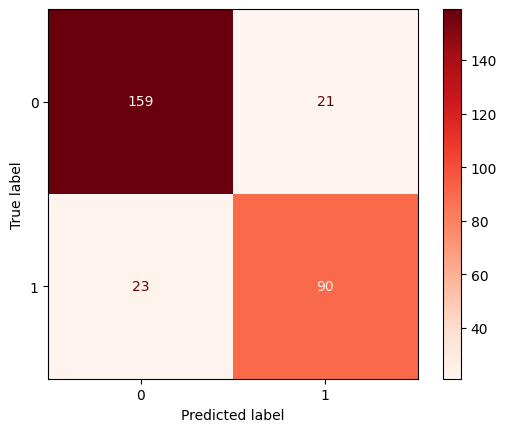

In [54]:
y_pred_lr_standard = lr.predict(X_train_standard)

print('F1 Score - train Set  : ', f1_score(y_train, y_pred_lr_standard), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_lr_standard), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_train_standard, y_train, cmap='Reds'))

F1 Score - test Set  :  0.7012987012987013 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        61
         1.0       0.68      0.73      0.70        37

    accuracy                           0.77        98
   macro avg       0.75      0.76      0.75        98
weighted avg       0.77      0.77      0.77        98
 

Confusion Matrix      : 


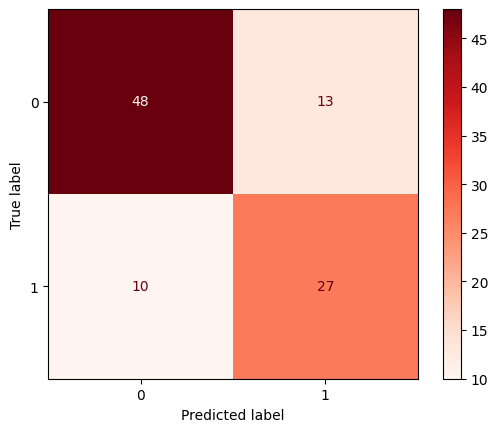

In [55]:
# Check Performance Model against Test-Set

y_pred_lr_standard_test = lr.predict(X_test_standard)

print('F1 Score - test Set  : ', f1_score(y_test, y_pred_lr_standard_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_lr_standard_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_test_standard, y_test, cmap='Reds'))

###KNN:

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train_standard,y_train)

KNeighborsClassifier()

F1 Score - train Set  :  0.8055555555555556 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       180
         1.0       0.84      0.77      0.81       113

    accuracy                           0.86       293
   macro avg       0.85      0.84      0.85       293
weighted avg       0.86      0.86      0.86       293
 

Confusion Matrix      : 


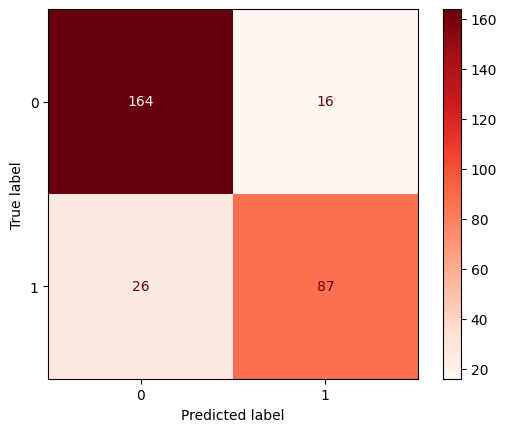

In [57]:
y_pred_knn_standard = knn.predict(X_train_standard)

print('F1 Score - train Set  : ', f1_score(y_train, y_pred_knn_standard), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_knn_standard), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_standard, y_train, cmap='Reds'))

F1 Score - test Set  :  0.6756756756756757 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        61
         1.0       0.68      0.68      0.68        37

    accuracy                           0.76        98
   macro avg       0.74      0.74      0.74        98
weighted avg       0.76      0.76      0.76        98
 

Confusion Matrix      : 


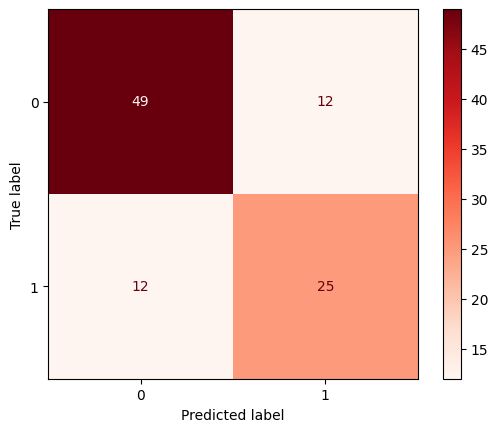

In [58]:
# Check Performance Model against Test-Set

y_pred_knn_standard_test = knn.predict(X_test_standard)

print('F1 Score - test Set  : ', f1_score(y_test, y_pred_knn_standard_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_knn_standard_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_test_standard, y_test, cmap='Reds'))

###SVC:

In [59]:
svc = SVC()
svc.fit(X_train_standard,y_train)

SVC()

F1 Score - train Set  :  0.8093023255813954 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       180
         1.0       0.85      0.77      0.81       113

    accuracy                           0.86       293
   macro avg       0.86      0.84      0.85       293
weighted avg       0.86      0.86      0.86       293
 

Confusion Matrix      : 


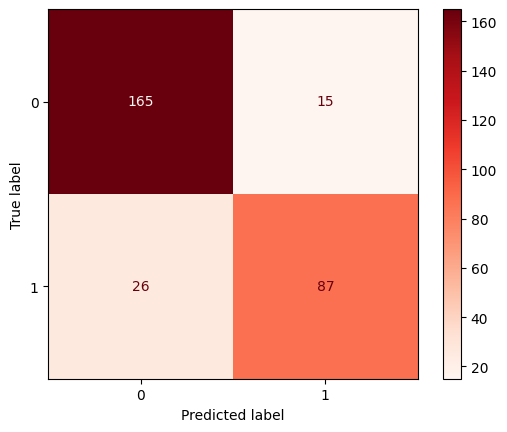

In [60]:
y_pred_svc_standard = svc.predict(X_train_standard)

print('F1 Score - train Set  : ', f1_score(y_train, y_pred_svc_standard), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_svc_standard), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_train_standard, y_train, cmap='Reds'))

F1 Score - test Set  :  0.7272727272727273 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        61
         1.0       0.70      0.76      0.73        37

    accuracy                           0.79        98
   macro avg       0.77      0.78      0.78        98
weighted avg       0.79      0.79      0.79        98
 

Confusion Matrix      : 


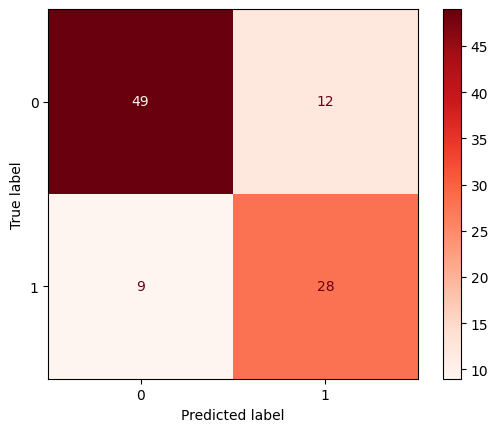

In [61]:
# Check Performance Model against Test-Set

y_pred_svc_standard_test = svc.predict(X_test_standard)

print('F1 Score - test Set  : ', f1_score(y_test, y_pred_svc_standard_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_svc_standard_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_test_standard, y_test, cmap='Reds'))

###Standard Comparison:

In [62]:
print(f"LR-Train: {f1_score(y_train, y_pred_lr_standard)}")
print(f"LR-Test: {f1_score(y_test, y_pred_lr_standard_test)}")
print(f"Difference: {f1_score(y_train, y_pred_lr_standard)-f1_score(y_test, y_pred_lr_standard_test)}")
print("")
print(f"KNN-Train: {f1_score(y_train, y_pred_knn_standard)}")
print(f"KNN-Test: {f1_score(y_test, y_pred_knn_standard_test)}")
print(f"Difference: {f1_score(y_train, y_pred_knn_standard)-f1_score(y_test, y_pred_knn_standard_test)}")
print("")
print(f"SVC-Train: {f1_score(y_train, y_pred_svc_standard)}")
print(f"SVC-Test: {f1_score(y_test, y_pred_svc_standard_test)}")
print(f"Difference: {f1_score(y_train, y_pred_svc_standard)-f1_score(y_test, y_pred_svc_standard_test)}")

LR-Train: 0.8035714285714286
LR-Test: 0.7012987012987013
Difference: 0.10227272727272729

KNN-Train: 0.8055555555555556
KNN-Test: 0.6756756756756757
Difference: 0.12987987987987992

SVC-Train: 0.8093023255813954
SVC-Test: 0.7272727272727273
Difference: 0.08202959830866807


#Pipeline Preprocessing (Robust Scaler)

In [63]:
robust_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             RobustScaler())
pay_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                 pay_ord)
edu_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                 edu_ord)
RobustScaler_pipeline = ColumnTransformer([
    ('minmax_pipe', robust_pipeline, num_columns_new2),
    ('pay_pipe', pay_pipeline, pay_columns),
    ('edu_pipe', edu_pipeline, education_column)
],
remainder="passthrough",
)

In [64]:
RobustScaler_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmax_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['limit_balance']),
                                ('pay_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6....
                                                                             [-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6.0,
                                                                              7.0,
                                                                              8.0,
                                                                              9.0],
                                                                             [-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6.0,
                                                                              7.0,
                                                                              8.0,
                                                                              9.0],
                                                                             [-1.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0,
                                                                              4.0,
                                                                              5.0,
                                                                              6.0,
                                                                              7.0,
                                                                              8.0,
                                                                              9.0]]))]),
                                 ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
                                  'pay_6']),
                                ('edu_pipe',
                                 Pipeline(st

In [65]:
X_train_robust= RobustScaler_pipeline.fit_transform(X_train)
X_test_robust= RobustScaler_pipeline.transform(X_test)

###Logistic Regression:

In [66]:
lr = LogisticRegression(random_state=11)
lr.fit(X_train_robust,y_train)

LogisticRegression(random_state=11)

F1 Score - train Set  :  0.8035714285714286 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       180
         1.0       0.81      0.80      0.80       113

    accuracy                           0.85       293
   macro avg       0.84      0.84      0.84       293
weighted avg       0.85      0.85      0.85       293
 

Confusion Matrix      : 


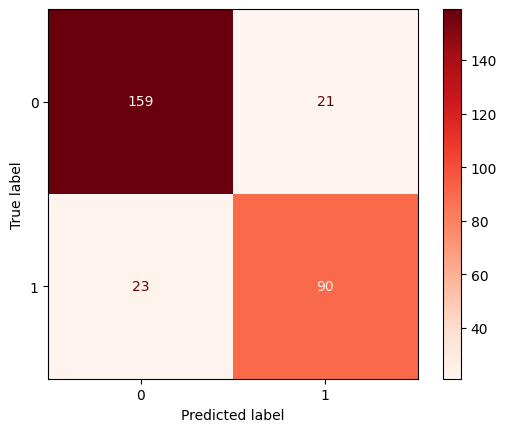

In [67]:
y_pred_lr_robust = lr.predict(X_train_robust)

print('F1 Score - train Set  : ', f1_score(y_train, y_pred_lr_robust), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_lr_robust), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_train_robust, y_train, cmap='Reds'))

F1 Score - test Set  :  0.7012987012987013 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        61
         1.0       0.68      0.73      0.70        37

    accuracy                           0.77        98
   macro avg       0.75      0.76      0.75        98
weighted avg       0.77      0.77      0.77        98
 

Confusion Matrix      : 


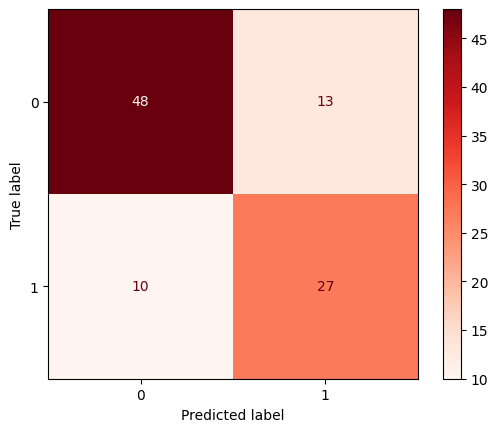

In [68]:
# Check Performance Model against Test-Set

y_pred_lr_robust_test = lr.predict(X_test_robust)

print('F1 Score - test Set  : ', f1_score(y_test, y_pred_lr_robust_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_lr_robust_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_test_robust, y_test, cmap='Reds'))

###KNN:

In [69]:
knn = KNeighborsClassifier()
knn.fit(X_train_robust,y_train)

KNeighborsClassifier()

F1 Score - train Set  :  0.8165137614678899 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       180
         1.0       0.85      0.79      0.82       113

    accuracy                           0.86       293
   macro avg       0.86      0.85      0.85       293
weighted avg       0.86      0.86      0.86       293
 

Confusion Matrix      : 


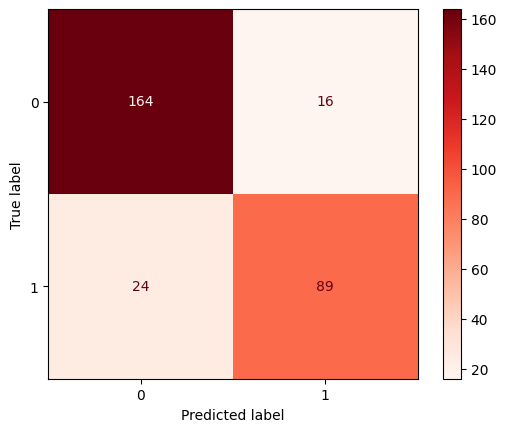

In [70]:
y_pred_knn_robust = knn.predict(X_train_robust)

print('F1 Score - train Set  : ', f1_score(y_train, y_pred_knn_robust), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_knn_robust), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_robust, y_train, cmap='Reds'))

F1 Score - test Set  :  0.7105263157894737 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.83      0.80      0.82        61
         1.0       0.69      0.73      0.71        37

    accuracy                           0.78        98
   macro avg       0.76      0.77      0.76        98
weighted avg       0.78      0.78      0.78        98
 

Confusion Matrix      : 


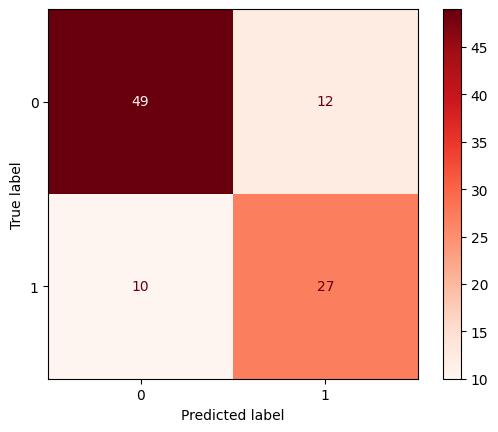

In [71]:
# Check Performance Model against Test-Set

y_pred_knn_robust_test = knn.predict(X_test_robust)

print('F1 Score - test Set  : ', f1_score(y_test, y_pred_knn_robust_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_knn_robust_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_test_robust, y_test, cmap='Reds'))

###SVC:

In [72]:
svc = SVC()
svc.fit(X_train_robust,y_train)

SVC()

F1 Score - train Set  :  0.8093023255813954 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       180
         1.0       0.85      0.77      0.81       113

    accuracy                           0.86       293
   macro avg       0.86      0.84      0.85       293
weighted avg       0.86      0.86      0.86       293
 

Confusion Matrix      : 


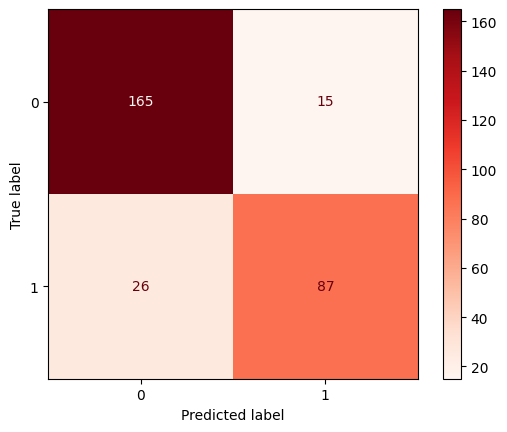

In [73]:
y_pred_svc_robust = svc.predict(X_train_robust)

print('F1 Score - train Set  : ', f1_score(y_train, y_pred_svc_robust), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_svc_robust), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_train_robust, y_train, cmap='Reds'))

F1 Score - test Set  :  0.7272727272727273 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        61
         1.0       0.70      0.76      0.73        37

    accuracy                           0.79        98
   macro avg       0.77      0.78      0.78        98
weighted avg       0.79      0.79      0.79        98
 

Confusion Matrix      : 


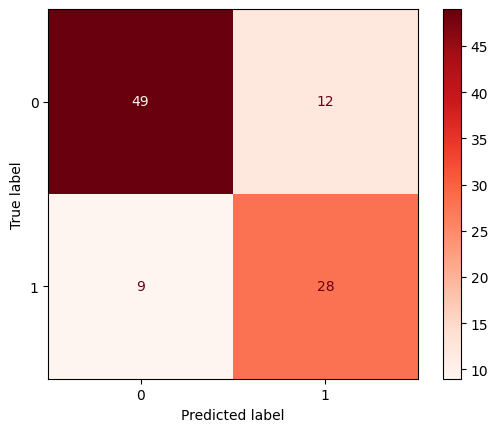

In [74]:
# Check Performance Model against Test-Set

y_pred_svc_robust_test = svc.predict(X_test_robust)

print('F1 Score - test Set  : ', f1_score(y_test, y_pred_svc_robust_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_svc_robust_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_test_robust, y_test, cmap='Reds'))

###Robust Comparison:

In [75]:
print(f"LR-Train: {f1_score(y_train, y_pred_lr_robust)}")
print(f"LR-Test: {f1_score(y_test, y_pred_lr_robust_test)}")
print(f"Difference: {f1_score(y_train, y_pred_lr_robust)-f1_score(y_test, y_pred_lr_robust_test)}")
print("")
print(f"KNN-Train: {f1_score(y_train, y_pred_knn_robust)}")
print(f"KNN-Test: {f1_score(y_test, y_pred_knn_robust_test)}")
print(f"Difference: {f1_score(y_train, y_pred_knn_robust)-f1_score(y_test, y_pred_knn_robust_test)}")
print("")
print(f"SVC-Train: {f1_score(y_train, y_pred_svc_robust)}")
print(f"SVC-Test: {f1_score(y_test, y_pred_svc_robust_test)}")
print(f"Difference: {f1_score(y_train, y_pred_svc_robust)-f1_score(y_test, y_pred_svc_robust_test)}")

LR-Train: 0.8035714285714286
LR-Test: 0.7012987012987013
Difference: 0.10227272727272729

KNN-Train: 0.8165137614678899
KNN-Test: 0.7105263157894737
Difference: 0.10598744567841623

SVC-Train: 0.8093023255813954
SVC-Test: 0.7272727272727273
Difference: 0.08202959830866807


#**Scaler Insight:**
- Between three different scalers (MinMax, Standard, and Robust) and three different classifiers (Logistic Regression, KNN, and SVM), all have around the same f1 score for their train and test set. About 0.8 for train and 0.7 for test, this means that the model is overfitted, therefore we could try fixing it through hyper parameter tuning.

#Logistic Regression Hyperparameter Tuning

##Baseline

In [76]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_lr_robust, y_test, y_pred_lr_robust_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - precision,0.810811
train - recall,0.796460
train - accuracy,0.849829
train - f1_score,0.803571
test - precision,0.675000
test - recall,0.729730
test - accuracy_score,0.765306
test - f1_score,0.701299


##Random Search

In [77]:
# Hyperparameter Tuning : Random Search
# Define Hyperparameters
penalty = [None,'l2']
class_weight = [None, 'balanced']
solver = ['saga','lbfgs']
max_iter = [int(x) for x in np.linspace(start=0, stop=1000, num=20)]

logistic_params = {'penalty': penalty,
                   'C':[0.001, 0.01, 0.1, 1, 10, 100],
                   'solver':solver,
                   'class_weight':class_weight,
                   'max_iter':max_iter
                        }

In [78]:
# Train with Random Search
%%time

lr_randomcv = RandomizedSearchCV(estimator=LogisticRegression(),
                                 param_distributions=logistic_params,
                                 random_state=11,
                                 n_iter=50,
                                 cv=25,
                                 n_jobs=-1,
                                 scoring='f1')
lr_randomcv.fit(X_train_robust, y_train)

CPU times: user 1.5 s, sys: 154 ms, total: 1.65 s
Wall time: 30.9 s


RandomizedSearchCV(cv=25, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [0, 52, 105, 157, 210, 263,
                                                     315, 368, 421, 473, 526,
                                                     578, 631, 684, 736, 789,
                                                     842, 894, 947, 1000],
                                        'penalty': [None, 'l2'],
                                        'solver': ['saga', 'lbfgs']},
                   random_state=11, scoring='f1')

In [79]:
# Get Best Hyperparameters

lr_randomcv.best_params_

{'solver': 'saga',
 'penalty': 'l2',
 'max_iter': 368,
 'class_weight': 'balanced',
 'C': 0.1}

In [80]:
# Get Best Estimator

lr_randomcv_best = lr_randomcv.best_estimator_

F1 Score - Train Set   :  0.8193832599118943 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       180
         1.0       0.82      0.82      0.82       113

    accuracy                           0.86       293
   macro avg       0.85      0.85      0.85       293
weighted avg       0.86      0.86      0.86       293
 

Confusion Matrix      : 


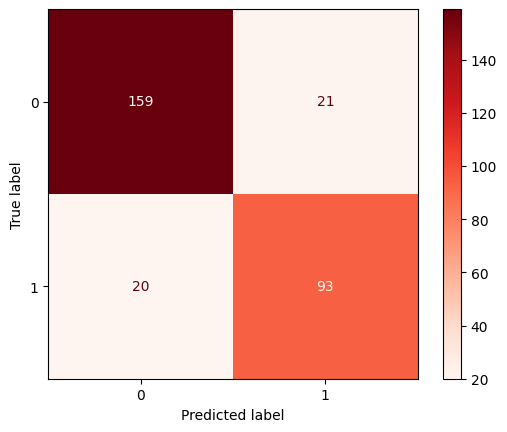

In [81]:
y_pred_lr_random = lr_randomcv_best.predict(X_train_robust)

print('F1 Score - Train Set   : ', f1_score(y_train, y_pred_lr_random), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_lr_random), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr_randomcv_best, X_train_robust, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.7341772151898734 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.79      0.82        61
         1.0       0.69      0.78      0.73        37

    accuracy                           0.79        98
   macro avg       0.77      0.79      0.78        98
weighted avg       0.79      0.79      0.79        98
 

Confusion Matrix      : 


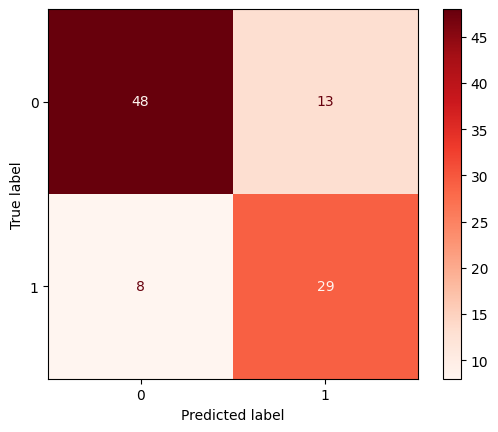

In [82]:
# Check Performance Model against Test-Set

y_pred_lr_random_test = lr_randomcv_best.predict(X_test_robust)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_lr_random_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_lr_random_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr_randomcv_best, X_test_robust, y_test, cmap='Reds'))

In [83]:
feature_importance = abs(lr_randomcv_best.coef_[0])
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i}: {importance}")

Feature Importance:
Feature 0: 0.21133724589896638
Feature 1: 0.81742612053515
Feature 2: 0.08298713034484002
Feature 3: 0.16711603142120787
Feature 4: 0.18859669369345117
Feature 5: 0.11901540787978315
Feature 6: 0.353775566094774
Feature 7: 0.05127051040123618


##Logistic Regression Comparison Table

In [84]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_lr_random, y_test, y_pred_lr_random_test, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - precision,0.810811,0.815789
train - recall,0.796460,0.823009
train - accuracy,0.849829,0.860068
train - f1_score,0.803571,0.819383
test - precision,0.675000,0.690476
test - recall,0.729730,0.783784
test - accuracy_score,0.765306,0.785714
test - f1_score,0.701299,0.734177


##Logistic Regression Model Inference

In [85]:
# Get Intercept and Slope

print('Intercept : ', lr_randomcv_best.intercept_)
print('Slope : ', lr_randomcv_best.coef_)

Intercept :  [-1.44759633]
Slope :  [[-0.21133725  0.81742612 -0.08298713  0.16711603  0.18859669  0.11901541
   0.35377557  0.05127051]]


$Insight:$
- The intercept is approximately -1.4475.
The coefficients for the independent variables are approximately:
- -0.21135786 for `limit_balance`
- 0.81741602 for `pay_0`
- -0.08299228 for `pay_2`
- 0.16712264 for `pay_3`
- 0.18858556 for `pay_4`
- 0.11903366 for `education_level`
- 0.35376789 for `pay_5`
- 0.05124457 for `pay_6`

In [86]:
X_train.head()

,limit_balance,pay_0,pay_2,pay_3,pay_4,education_level,pay_5,pay_6
2385,130000.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0
2217,170000.0,-1.0,2.0,-1.0,2.0,1.0,-1.0,-1.0
2236,170000.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
1879,280000.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
2254,250000.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [87]:
new_data=np.array([0.0,-1.0,-1.0,-1.0,-1.0,4,-1.0,-1.0])
new_data=new_data.reshape(1, -1)
new_data.shape

(1, 8)

In [88]:
lr_randomcv_best.predict(new_data)

array([0.])

#KNN Hyperparameter Tuning

##Baseline

In [89]:
# Save Classification Report into a Dictionary

knn_reports = {}
def performance_report(knn_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  knn_reports[name] = score_reports
  return knn_reports

knn_reports = performance_report(knn_reports, y_train, y_pred_knn_robust, y_test, y_pred_knn_robust_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(knn_reports)

,Baseline (Default Hyperparameter)
train - precision,0.847619
train - recall,0.787611
train - accuracy,0.863481
train - f1_score,0.816514
test - precision,0.692308
test - recall,0.729730
test - accuracy_score,0.775510
test - f1_score,0.710526


##Random Search

In [90]:
# Hyperparameter Tuning : Random Search
# Define Hyperparameters
n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
weights = ['uniform', 'distance']

knn_params = {'n_neighbors': n_neighbors,
                   'weights': weights,
                        }

In [91]:
# Train with Random Search
%%time

knn_randomcv = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                 param_distributions=knn_params,
                                 random_state=55,
                                 n_iter=50,
                                 cv=25,
                                 n_jobs=-1,
                                 scoring='f1')
knn_randomcv.fit(X_train_robust, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 552 ms, sys: 19.7 ms, total: 572 ms
Wall time: 6.26 s


RandomizedSearchCV(cv=25, estimator=KNeighborsClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19, 21, 23, 25,
                                                        27, 29, 31, 33, 35, 37,
                                                        39],
                                        'weights': ['uniform', 'distance']},
                   random_state=55, scoring='f1')

In [92]:
# Get Best Hyperparameters

knn_randomcv.best_params_

{'weights': 'uniform', 'n_neighbors': 15}

In [93]:
# Get Best Estimator

knn_randomcv_best = knn_randomcv.best_estimator_

F1 Score - Train Set   :  0.8110599078341014 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       180
         1.0       0.85      0.78      0.81       113

    accuracy                           0.86       293
   macro avg       0.86      0.84      0.85       293
weighted avg       0.86      0.86      0.86       293
 

Confusion Matrix      : 


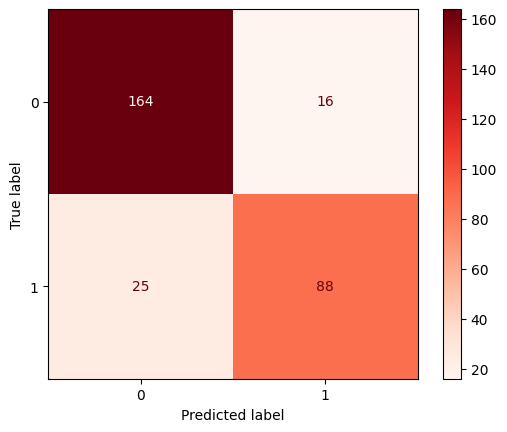

In [94]:
y_pred_knn_random = knn_randomcv_best.predict(X_train_robust)

print('F1 Score - Train Set   : ', f1_score(y_train, y_pred_knn_random), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_knn_random), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_randomcv_best, X_train_robust, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.7272727272727273 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        61
         1.0       0.70      0.76      0.73        37

    accuracy                           0.79        98
   macro avg       0.77      0.78      0.78        98
weighted avg       0.79      0.79      0.79        98
 

Confusion Matrix      : 


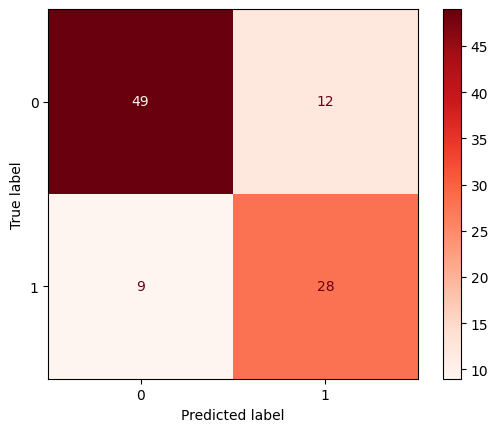

In [95]:
# Check Performance Model against Test-Set

y_pred_knn_random_test = knn_randomcv_best.predict(X_test_robust)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_knn_random_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_knn_random_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_randomcv_best, X_test_robust, y_test, cmap='Reds'))

In [96]:
# Save Classification Report into a Dictionary

knn_reports = performance_report(knn_reports, y_train, y_pred_knn_random, y_test, y_pred_knn_random_test, 'Random Search')
pd.DataFrame(knn_reports)

,Baseline (Default Hyperparameter),Random Search
train - precision,0.847619,0.846154
train - recall,0.787611,0.778761
train - accuracy,0.863481,0.860068
train - f1_score,0.816514,0.811060
test - precision,0.692308,0.700000
test - recall,0.729730,0.756757
test - accuracy_score,0.775510,0.785714
test - f1_score,0.710526,0.727273


##Grid Search

In [97]:
grid_knn_params = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
    'weights': ['uniform', 'distance'],
}

grid_knn_params

{'n_neighbors': [1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39],
 'weights': ['uniform', 'distance']}

In [98]:
# Train with Grid Search
%%time

knn_gridcv = GridSearchCV(estimator=KNeighborsClassifier(),
                         param_grid=grid_knn_params,
                         cv=50,
                         n_jobs=-1,
                         scoring='f1')

knn_gridcv.fit(X_train_robust, y_train)

CPU times: user 1.04 s, sys: 65 ms, total: 1.1 s
Wall time: 14.4 s


GridSearchCV(cv=50, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [99]:
# Get Best Hyperparameters

knn_gridcv.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

In [100]:
knn_gridcv_best = knn_gridcv.best_estimator_

F1 Score - Train Set   :  0.8110599078341014 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       180
         1.0       0.85      0.78      0.81       113

    accuracy                           0.86       293
   macro avg       0.86      0.84      0.85       293
weighted avg       0.86      0.86      0.86       293
 

Confusion Matrix      : 


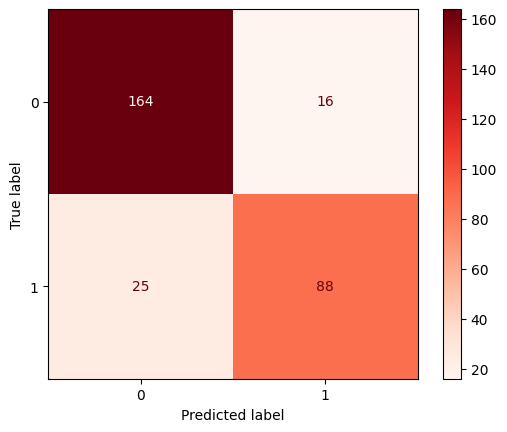

In [101]:
y_pred_knn_grid = knn_gridcv_best.predict(X_train_robust)

print('F1 Score - Train Set   : ', f1_score(y_train, y_pred_knn_grid), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_knn_grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_gridcv_best, X_train_robust, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.7272727272727273 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        61
         1.0       0.70      0.76      0.73        37

    accuracy                           0.79        98
   macro avg       0.77      0.78      0.78        98
weighted avg       0.79      0.79      0.79        98
 

Confusion Matrix      : 


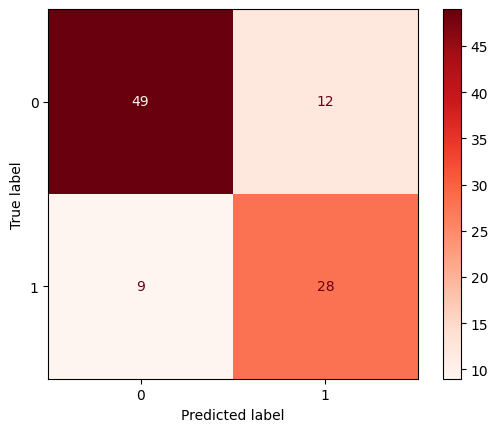

In [102]:
# Check Performance Model against Test-Set

y_pred_knn_grid_test = knn_randomcv_best.predict(X_test_robust)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_knn_grid_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_knn_grid_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_randomcv_best, X_test_robust, y_test, cmap='Reds'))

##KNN Comparison Table

In [103]:
# Save Classification Report into a Dictionary

knn_reports = performance_report(knn_reports, y_train, y_pred_knn_grid, y_test, y_pred_knn_grid_test, 'grid Search')
pd.DataFrame(knn_reports)

,Baseline (Default Hyperparameter),Random Search,grid Search
train - precision,0.847619,0.846154,0.846154
train - recall,0.787611,0.778761,0.778761
train - accuracy,0.863481,0.860068,0.860068
train - f1_score,0.816514,0.811060,0.811060
test - precision,0.692308,0.700000,0.700000
test - recall,0.729730,0.756757,0.756757
test - accuracy_score,0.775510,0.785714,0.785714
test - f1_score,0.710526,0.727273,0.727273


$Insight:$
- GridCV and Random Search method in KNN returns the same f1 scores.

#SVC Hyperparameter Tuning

##Model Training using different Kernels

In [104]:
# Model Training using different kernels
%%time

svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train_standard, y_train)
svm_poly.fit(X_train_standard, y_train)
svm_rbf.fit(X_train_standard, y_train)

CPU times: user 20.3 ms, sys: 1.79 ms, total: 22.1 ms
Wall time: 23.7 ms


SVC()

In [105]:
def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  return f1_score(y, y_pred)

In [106]:
# Model Evaluation

print('SVM - Linear')
print('Train : ', performance_check(svm_linear, X_train_standard, y_train))
print('Test  : ', performance_check(svm_linear, X_test_standard, y_test))
print('')

print('SVM - Polynomial')
print('Train : ', performance_check(svm_poly, X_train_standard, y_train))
print('Test  : ', performance_check(svm_poly, X_test_standard, y_test))
print('')

print('SVM - RBF')
print('Train : ', performance_check(svm_rbf, X_train_standard, y_train))
print('Test  : ', performance_check(svm_rbf, X_test_standard, y_test))
print('')

SVM - Linear
Train :  0.8177777777777778
Test  :  0.7341772151898734

SVM - Polynomial
Train :  0.8133971291866029
Test  :  0.6933333333333334

SVM - RBF
Train :  0.8093023255813954
Test  :  0.7272727272727273



In [107]:
y_train = y_train.astype(np.int_)
y_test = y_test.astype(np.int_)

##Different Hyperparameter C

To understand the effect of of C tuning, we will try with 2 extreme values, with 0.1 on the low end and 500 on the high end.

In [108]:
# Model Training using different C
%%time

svm_rbf_1 = SVC(kernel='rbf', C=0.1)
svm_rbf_500 = SVC(kernel='rbf', C=500)

svm_rbf_1.fit(X_train_standard, y_train)
svm_rbf_500.fit(X_train_standard, y_train)

CPU times: user 58.7 ms, sys: 703 µs, total: 59.4 ms
Wall time: 75.2 ms


SVC(C=500)

In [109]:
# Model Evaluation

print('SVM - C=0.1')
print('Train : ', performance_check(svm_rbf_1, X_train_standard, y_train))
print('Test  : ', performance_check(svm_rbf_1, X_test_standard, y_test))
print('')

print('SVM - C=500')
print('Train : ', performance_check(svm_rbf_500, X_train_standard, y_train))
print('Test  : ', performance_check(svm_rbf_500, X_test_standard, y_test))
print('')

SVM - C=0.1
Train :  0.8093023255813954
Test  :  0.7272727272727273

SVM - C=500
Train :  0.8584474885844748
Test  :  0.7012987012987013



$Insight:$
It seems even this method returns similar scores.

#**Hyperparameter Insight:**

- It seems setting different hyperparameters for KNN, SVC, and Logistic Regression still couldn't fit the overfitting issue, therefore we can conclude that the hyperparameter tuning is not the solution.
- What could be done is using dimensiolity reduction on the selected features, to see if the features and target share a linear relationship, if it doesn't then logistic regression shouldn't be used.
- After using dimensiolity reduction, we could also see if there is a clear margin of separation between classes, to see if using SVM is justified.
- Lastly, KNN should be used if instances are close to each other.

#**Final Conclusion:**

From features selection:
- The features from `cat_columns` have no correlation to the target
- The features from `ord_columns` that have a correlation to the target include: `education_level, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6`.
- The features from `num_columns` that have a correlation to the target include:
`limit_balance pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6`.
Therefore we will use the feature with the highest correlation and lowest p-value, which is:
- `education_level` to know the subject's education level.
- `pay_0` to `pay_6` to know the subject's tendency to pay.
- `limit_balance` to know subject's current limit balance.
These features show significant correlations with the target and have relatively low p-values, indicating that the associations are statistically significant.

From features scaling:
- Between three different scalers (MinMax, Standard, and Robust) and three different classifiers (Logistic Regression, KNN, and SVM), all have around the same f1 score for their train and test set. About 0.8 for train and 0.7 for test, this means that the model is overfitted, therefore we could try fixing it through hyper parameter tuning.

from hyperparameter tuning:
- It seems setting different hyperparameters for KNN, SVC, and Logistic Regression still couldn't fit the overfitting issue, therefore we can conclude that the hyperparameter tuning is not the solution.
- What could be done is using dimensiolity reduction on the selected features, to see if the features and target share a linear relationship, if it doesn't then logistic regression shouldn't be used.
- After using dimensiolity reduction, we could also see if there is a clear margin of separation between classes, to see if using SVM is justified.
- Lastly, KNN should be used if instances are close to each other.

#Model Saving:

In [110]:
lr = LogisticRegression(random_state=11)
lr.fit(X_train_robust,y_train)

LogisticRegression(random_state=11)

In [111]:
num_columns_new2

['limit_balance']

In [112]:
pay_columns

['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [113]:
education_column

['education_level']

In [114]:
import joblib

pay_0_values = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
pay_2_values = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
pay_3_values = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
pay_4_values = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
pay_5_values = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
pay_6_values = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
education_level_values = [1, 2, 3, 4]
pay_ord = OrdinalEncoder(categories=[pay_0_values, pay_2_values, pay_3_values, pay_4_values, pay_5_values, pay_6_values])
edu_ord = OrdinalEncoder(categories=[education_level_values])

robust_pipeline = make_pipeline(SimpleImputer(strategy='median'), RobustScaler())
pay_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), pay_ord)
edu_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), edu_ord)

RobustScaler_pipeline = ColumnTransformer([
    ('minmax_pipe', robust_pipeline, num_columns_new2),
    ('pay_pipe', pay_pipeline, pay_columns),
    ('edu_pipe', edu_pipeline, education_column)
],
remainder="passthrough"
)


# Fit the pipeline to your data
RobustScaler_pipeline.fit(X_train, y_train)

# Save the entire pipeline including preprocessing steps
joblib.dump(RobustScaler_pipeline, 'robust_logreg.joblib')

['robust_logreg.joblib']

In [115]:
with open('lr.pkl', 'wb') as file:
    pickle.dump(lr, file)

with open('list_num_cols.txt', 'w') as num_columns_file:
    json.dump(num_columns_new2, num_columns_file)

with open('list_pay_cols.txt', 'w') as pay_columns_file:
    json.dump(pay_columns, pay_columns_file)

with open('list_edu_col.txt', 'w') as edu_column_file:
    json.dump(education_column, edu_column_file)